# **R**
1) Cargar el paquete arules   

In [1]:
library (arules) 
library (arulesViz)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Loading required package: grid

Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus



2) Importar el archivo usando la instrucción read.transaction  
  a. Si tengo un registro por transacción :  
*   Abrir el archivo con editor para verlo.  

In [2]:
basket <- read.transactions("../input/dataset/2000_1_1.csv", format = "basket", sep = ',', rm.duplicates = TRUE)

distribution of transactions with duplicates:
1 
1 


Arreglamos el dataset para operar sobre el

In [3]:
inspect(head(basket))

    items
[1] {116,
     160,
     21, 
     224,
     233,
     33, 
     342,
     361,
     388,
     491,
     499,
     520,
     531,
     70, 
     744,
     794,
     871,
     916,
     976,
     98, 
     983,
     984}
[2] {106,
     113,
     16, 
     167,
     21, 
     271,
     337,
     364,
     409,
     487,
     496,
     523,
     607,
     709,
     764,
     926,
     999}
[3] {13, 
     217,
     233,
     286,
     334,
     478,
     546,
     551,
     656,
     693,
     882,
     964,
     965,
     974}
[4] {143,
     153,
     170,
     199,
     268,
     279,
     284,
     29, 
     295,
     348,
     430,
     448,
     469,
     54, 
     607,
     611,
     65, 
     652,
     702,
     715,
     726,
     779,
     802,
     840,
     894,
     917,
     927,
     931,
     932,
     944}
[5] {146,
     174,
     178,
     184,
     23, 
     274,
     283,
     332,
     42, 
     521,
     528,
     577,
     596,
     631,
     661,
     679,


In [4]:
reglas <- apriori(basket, parameter=list(support=0.1,confidence = 0.6))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 10 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[823 item(s), 104 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Donde cols indica el número de columna que identifica al id de la transacción y al id del producto.  

3) Ejecutar : 

In [5]:
inspect(reglas)

In [6]:
reglas

set of 0 rules 

In [7]:
reglas_test <- apriori(basket, parameter=list(support=0.025,confidence = 0.6))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.025      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[823 item(s), 104 transaction(s)] done [0.00s].
sorting and recoding items ... [375 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 done [0.00s].
writing ... [1185 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [8]:
inspect(reglas_test)

       lhs                          rhs   support    confidence lift      count
[1]    {975}                     => {362} 0.02884615 1.0000000  20.800000 3    
[2]    {362}                     => {975} 0.02884615 0.6000000  20.800000 3    
[3]    {975}                     => {571} 0.02884615 1.0000000  17.333333 3    
[4]    {975}                     => {293} 0.02884615 1.0000000  20.800000 3    
[5]    {293}                     => {975} 0.02884615 0.6000000  20.800000 3    
[6]    {417}                     => {586} 0.02884615 1.0000000  26.000000 3    
[7]    {586}                     => {417} 0.02884615 0.7500000  26.000000 3    
[8]    {417}                     => {76}  0.02884615 1.0000000  17.333333 3    
[9]    {761}                     => {976} 0.02884615 1.0000000  11.555556 3    
[10]   {786}                     => {20}  0.02884615 1.0000000  13.000000 3    
[11]   {727}                     => {21}  0.02884615 1.0000000   6.117647 3    
[12]   {196}                     => {941

4) Cuántas reglas obtuvieron? De qué longitud?  

1185 reglas con longitud entre 2 y 7

5) Puedo ver las reglas que se generaron usando inspect()  

In [9]:
a <-inspect(head(reglas_test, n =10))
a

     lhs      rhs   support    confidence lift     count
[1]  {975} => {362} 0.02884615 1.00       20.80000 3    
[2]  {362} => {975} 0.02884615 0.60       20.80000 3    
[3]  {975} => {571} 0.02884615 1.00       17.33333 3    
[4]  {975} => {293} 0.02884615 1.00       20.80000 3    
[5]  {293} => {975} 0.02884615 0.60       20.80000 3    
[6]  {417} => {586} 0.02884615 1.00       26.00000 3    
[7]  {586} => {417} 0.02884615 0.75       26.00000 3    
[8]  {417} => {76}  0.02884615 1.00       17.33333 3    
[9]  {761} => {976} 0.02884615 1.00       11.55556 3    
[10] {786} => {20}  0.02884615 1.00       13.00000 3    


,lhs,,rhs,support,confidence,lift,count
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
[1],{975},=>,{362},0.02884615,1.00,20.80000,3
[2],{362},=>,{975},0.02884615,0.60,20.80000,3
[3],{975},=>,{571},0.02884615,1.00,17.33333,3
[4],{975},=>,{293},0.02884615,1.00,20.80000,3
[5],{293},=>,{975},0.02884615,0.60,20.80000,3
[6],{417},=>,{586},0.02884615,1.00,26.00000,3
[7],{586},=>,{417},0.02884615,0.75,26.00000,3
[8],{417},=>,{76},0.02884615,1.00,17.33333,3
[9],{761},=>,{976},0.02884615,1.00,11.55556,3


In [10]:
inspect(sort(reglas_test, by = "lift"))  
inspect(head(reglas_test,n=10))  
inspect(head(sort(reglas_test, by = "lift"),n=10)) 

       lhs                          rhs   support    confidence lift      count
[1]    {618}                     => {915} 0.02884615 1.0000000  34.666667 3    
[2]    {915}                     => {618} 0.02884615 1.0000000  34.666667 3    
[3]    {618}                     => {979} 0.02884615 1.0000000  34.666667 3    
[4]    {979}                     => {618} 0.02884615 1.0000000  34.666667 3    
[5]    {915}                     => {979} 0.02884615 1.0000000  34.666667 3    
[6]    {979}                     => {915} 0.02884615 1.0000000  34.666667 3    
[7]    {792}                     => {728} 0.02884615 1.0000000  34.666667 3    
[8]    {728}                     => {792} 0.02884615 1.0000000  34.666667 3    
[9]    {519}                     => {542} 0.02884615 1.0000000  34.666667 3    
[10]   {542}                     => {519} 0.02884615 1.0000000  34.666667 3    
[11]   {519}                     => {692} 0.02884615 1.0000000  34.666667 3    
[12]   {692}                     => {519

6) Como pueden hacer para obtener los itemsets maximales? 

In [11]:
basket[is.maximal(basket)]

transactions in sparse format with
 104 transactions (rows) and
 823 items (columns)

**Probar los siguientes comandos:**  
• data("Groceries")  
• reglas <- apriori(Groceries, parameter=list(support=0.005,confidence = 0.3))  
• plot (reglas)  
• plot(reglas), measure=c("support", "lift"), shading="confidence")  
• plot(reglas, shading="order")  
• sel <- plot(reglas, measure=c("support", "lift"), shading="confidence", interactive=TRUE)  
• sel <- plot(reglas, method="grouped", interactive=TRUE)  

In [12]:
data("Groceries") 

In [13]:
reglas <- apriori(Groceries, parameter=list(support=0.005,confidence = 0.3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.3    0.1    1 none FALSE            TRUE       5   0.005      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 49 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [120 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [482 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [14]:
inspect(head(reglas))

    lhs              rhs                support     confidence lift     count
[1] {cake bar}    => {whole milk}       0.005592272 0.4230769  1.655775 55   
[2] {dishes}      => {other vegetables} 0.005998983 0.3410405  1.762550 59   
[3] {dishes}      => {whole milk}       0.005287239 0.3005780  1.176357 52   
[4] {mustard}     => {whole milk}       0.005185562 0.4322034  1.691492 51   
[5] {pot plants}  => {whole milk}       0.006914082 0.4000000  1.565460 68   
[6] {canned fish} => {other vegetables} 0.005083884 0.3378378  1.745998 50   


In [15]:
Groceries[is.maximal(Groceries)]

transactions in sparse format with
 4051 transactions (rows) and
 169 items (columns)

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



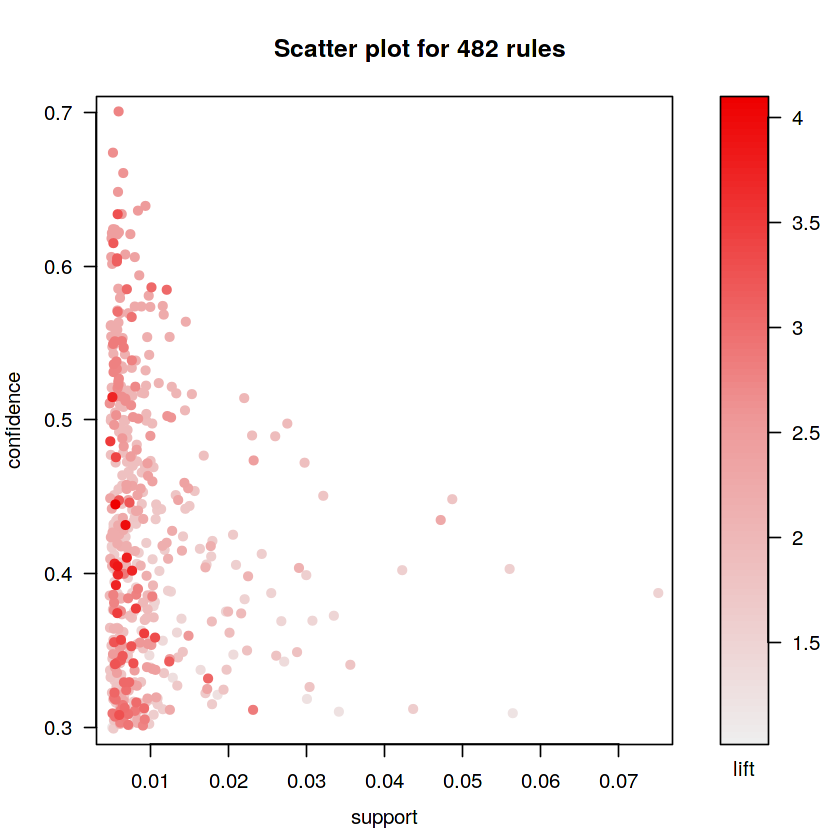

In [16]:
plot (reglas)

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



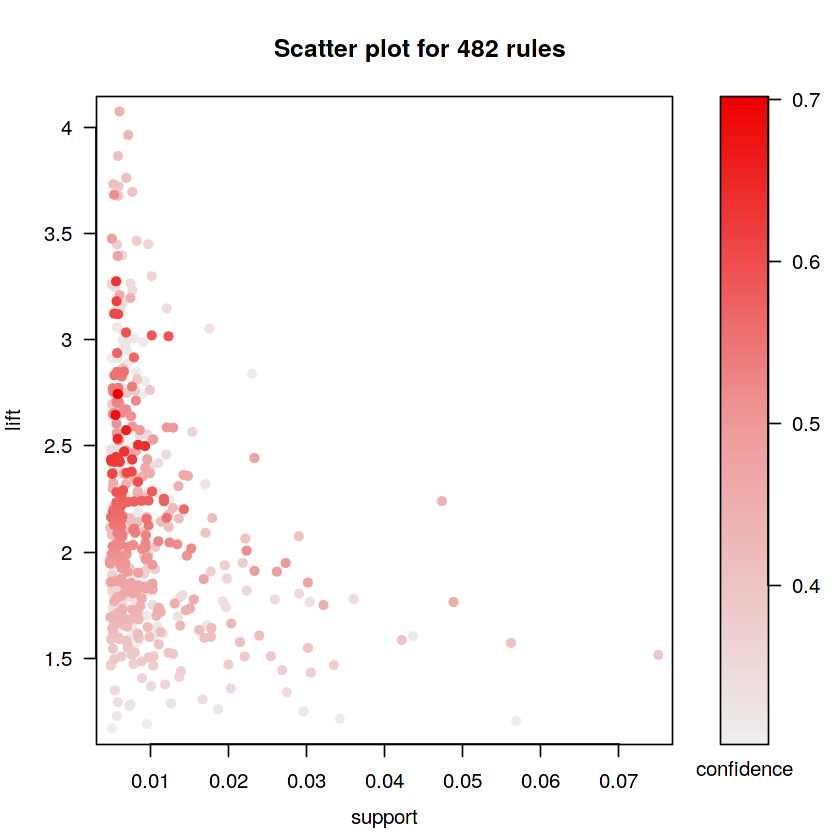

In [17]:
plot(reglas, measure=c("support", "lift"), shading="confidence")

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



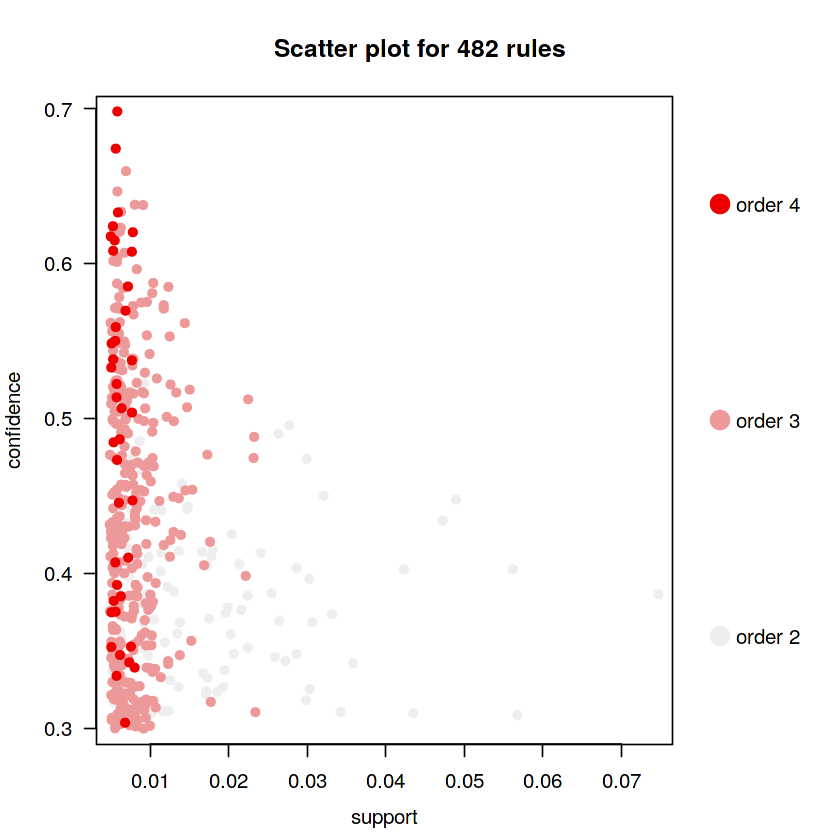

In [18]:
plot(reglas, shading="order")

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



Interactive mode.
Select a region with two clicks!


ERROR: Error in convertUnit(x, unitTo, "x", "location", "x", "location", valueOnly = valueOnly): 'x' argument must be a unit object


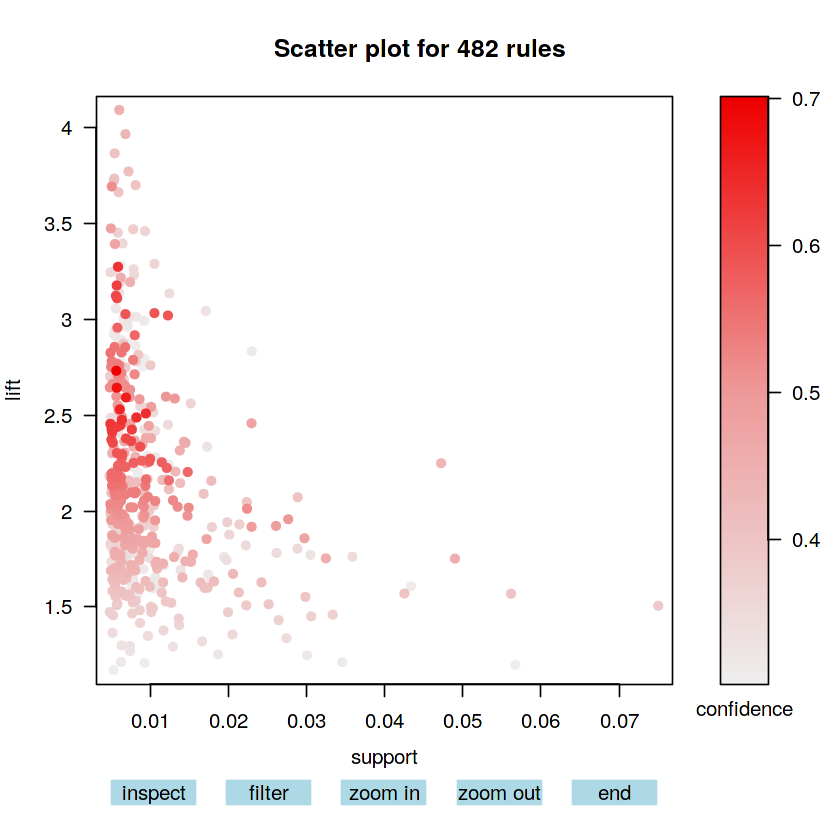

In [19]:
sel <- plot(reglas, measure=c("support", "lift"), shading="confidence", engine="interactive")  

Interactive mode.


ERROR: Error in convertUnit(x, unitTo, "x", "location", "x", "location", valueOnly = valueOnly): 'x' argument must be a unit object


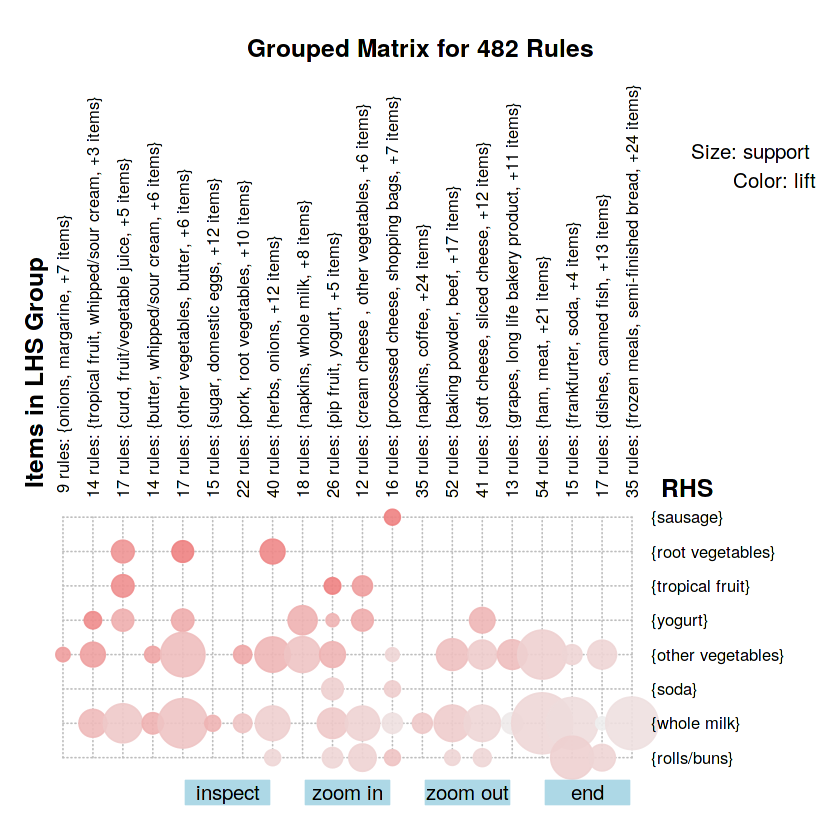

In [20]:
 sel <- plot(reglas, method="grouped", engine="interactive")  